In [195]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

### Task 1: Merge 12 months of sales into a single file

In [81]:
#df = pd.read_csv("./SalesAnalysis/sales_Data/Sales_April_2019.csv")
#create a empty df
all_months_data = pd.DataFrame()
files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')]
for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
all_months_data.to_csv("all_data.csv",index= False)
    


In [82]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Q1: What was the best month for sales? How much was earned that month?

### Drop NaN

In [83]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Find 'Or' and delete it

In [89]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data['Months'] = all_data['Order Date'].str[0:2].astype('int32')

In [85]:
#convert string to numbers
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [86]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [87]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Plot and visualize the Data

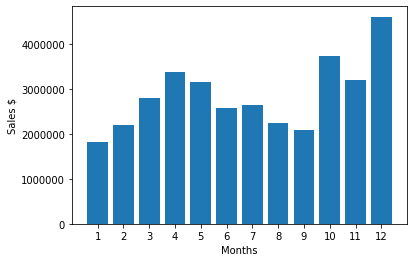

In [135]:
results=all_data.groupby(['Months']).sum()
Sales = results['Sales']
months = [x for x,df in all_data.groupby(['Months'])]
plt.bar(months,Sales)
plt.xlabel('Months')
plt.ylabel('Sales $')
plt.xticks(months)
plt.show()


### Q2: What city had the highest number of sales?

In [105]:
all_data['Purchase Address']

0         136 Church St, New York City, NY 10001
1            562 2nd St, New York City, NY 10001
2           277 Main St, New York City, NY 10001
3            410 6th St, San Francisco, CA 94016
4                  43 Hill St, Atlanta, GA 30301
                           ...                  
186845             795 Pine St, Boston, MA 02215
186846     495 North St, New York City, NY 10001
186847     319 Ridge St, San Francisco, CA 94016
186848      916 Main St, San Francisco, CA 94016
186849            209 11th St, Atlanta, GA 30301
Name: Purchase Address, Length: 185950, dtype: object

In [120]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]
#all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + "("+ get_state(x)+")")
#Use f string instead
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Months,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,12,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,12,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,12,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,12,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,12,Atlanta (GA)


In [122]:
results_city = all_data.groupby(['City']).sum()
results_city

,Quantity Ordered,Price Each,Month,Sales,Months
City,,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06,104794
Austin (TX),11153,1.809874e+06,69829,1.819582e+06,69829
Boston (MA),22528,3.637410e+06,141112,3.661642e+06,141112
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06,104620
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06,208325
New York City (NY),27932,4.635371e+06,175741,4.664317e+06,175741
Portland (ME),2750,4.471893e+05,17144,4.497583e+05,17144
Portland (OR),11303,1.860558e+06,70621,1.870732e+06,70621
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06,315520


Text(0, 0.5, 'Sales $')

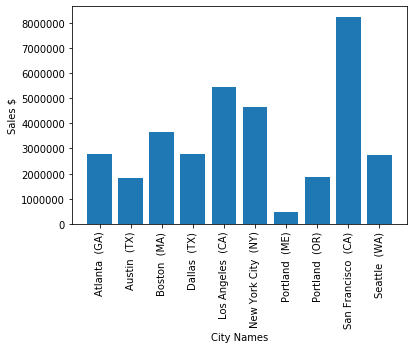

In [133]:
cities = [city for city, df in all_data.groupby('City')]
x = cities
y = results_city['Sales']
plt.bar(x,y)
plt.xticks(cities,rotation ='vertical',size=10)
plt.xlabel('City Names')
plt.ylabel('Sales $')
###notice that the city does not match the city in all_data if using:
#cities = all_data['City'].unique()

### Q3: What times should we display advertisements to maximize likehood of customer's buying products?

In [139]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Order Date']

0        2019-12-30 00:01:00
1        2019-12-29 07:03:00
2        2019-12-12 18:21:00
3        2019-12-22 15:13:00
4        2019-12-18 12:38:00
                 ...        
186845   2019-06-07 19:02:00
186846   2019-06-01 19:29:00
186847   2019-06-22 18:57:00
186848   2019-06-26 18:35:00
186849   2019-06-25 14:33:00
Name: Order Date, Length: 185950, dtype: datetime64[ns]

In [142]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Hour']

0          0
1          7
2         18
3         15
4         12
          ..
186845    19
186846    19
186847    18
186848    18
186849    14
Name: Hour, Length: 185950, dtype: int64

In [143]:
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Months,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,12,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,12,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,12,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,12,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,12,Atlanta (GA),12,38


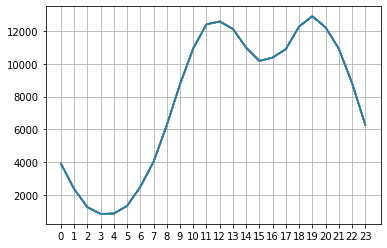

In [159]:
hours = [hour for hour,df in all_data.groupby(['Hour'])]
hours
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

### Q4: What products are sold together?

Products are sold together if the order IDs are the same

In [189]:
#keep=False to show all duplicates
#keep must be either "first", "last" or False
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby(['Order ID'])['Product'].transform(lambda x: "/".join(x))
df.head()

/Users/yeliu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Months,City,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,12,Boston (MA),12,37,Google Phone/USB-C Charging Cable/Bose SoundSp...
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,12,Boston (MA),12,37,Google Phone/USB-C Charging Cable/Bose SoundSp...
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,12,Boston (MA),12,37,Google Phone/USB-C Charging Cable/Bose SoundSp...
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,12,Boston (MA),12,37,Google Phone/USB-C Charging Cable/Bose SoundSp...
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,12,New York City (NY),14,32,Vareebadd Phone/USB-C Charging Cable


In [190]:
df = df[['Order ID','Grouped']].drop_duplicates()
df.head(10)

,Order ID,Grouped
16,295681,Google Phone/USB-C Charging Cable/Bose SoundSp...
36,295698,Vareebadd Phone/USB-C Charging Cable
42,295703,AA Batteries (4-pack)/Bose SoundSport Headphones
66,295726,iPhone/Lightning Charging Cable
76,295735,iPhone/Apple Airpods Headphones/Wired Headphones
80,295737,iPhone/Lightning Charging Cable
97,295753,34in Ultrawide Monitor/Lightning Charging Cable
104,295759,Bose SoundSport Headphones/Wired Headphones
129,295783,Vareebadd Phone/USB-C Charging Cable
133,295786,USB-C Charging Cable/Apple Airpods Headphones


### Count Pairs

In [201]:
count = Counter()
for row in df['Grouped']:
    row_list = row.split('/')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Q5: What product sold the most?

In [202]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Months,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,12,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,12,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,12,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,12,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,12,Atlanta (GA),12,38
5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,12,New York City (NY),22,58
6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,12,Portland (OR),15,10
7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,12,Dallas (TX),9,29
8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,12,Dallas (TX),23,26
9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,12,Dallas (TX),11,51


In [ ]:
product_group = all_data.groupby('Product')

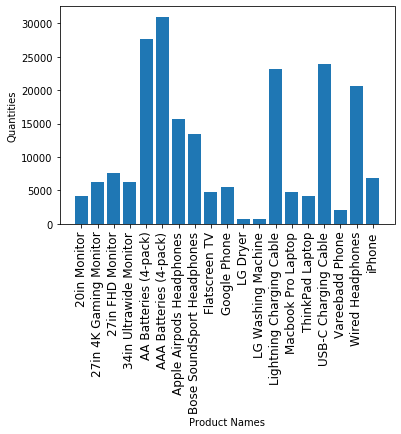

In [216]:
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [p for p, df in product_group]
plt.bar(products,quantity_ordered)
plt.xlabel('Product Names')
plt.ylabel('Quantities')
plt.xticks(rotation='vertical',size=12)
plt.show()

In [223]:
Product_prices = product_group.mean()['Price Each']
Product_prices


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

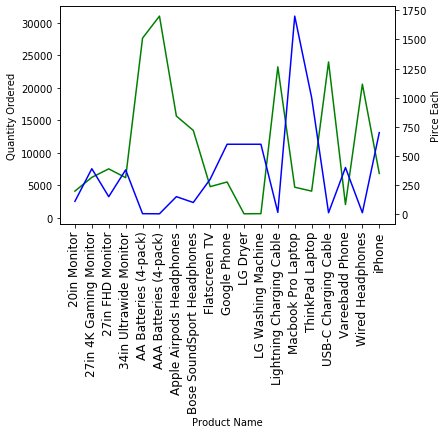

In [235]:
### Overladp two charts to confirm our assumptions that the quantities 
###correlates to unit price of each product
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
####
x = products
y1 = quantity_ordered
y2 = Product_prices
ax1.plot(x,y1,color = 'g')
ax2.plot(x,y2,color='b')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')

ax2.set_ylabel('Pirce Each')
ax1.set_xticklabels(x,rotation='vertical',size =12)
plt.show()